# Importando librerias

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import copy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
!pwd

/Users/feliperuiz/Desktop/github/stackage-evolution/notebooks


# Importando dataframes

In [6]:
lts_list = ['0-7', '2-22', '3-22', '6-35', '7-24', '9-21', '11-22', '12-14', '12-26', '13-11', '13-19', '14-27', '15-3', '16-11', '16-22']
df_list = []
df_by_category_list = []
path = '/Users/feliperuiz/Desktop/github/stackage-evolution/notebooks'

for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'{path}/lts-{lts}/lts-{lts}.df')
    df_list.append(df)
    
for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'{path}/lts-{lts}/lts-{lts}-by-category.df')
    df_by_category_list.append(df)

# Distribución

- ¿Como se distribuyen los paquetes en stackage?
- ¿Como se distribuyen los paquetes que utilizan mtl en Stackage?

Graficos:

1. Graficar la cantidad de paquetes de cantidad de paquetes de cada LTS considerando el tiempo en que se publico el spanshot
- Eje X: Tiempo 
- Eje Y: Cantidad de paquetes
- Puntos de la linea: LTS

2. Graficar la distribución de los paquetes respecto a sus categorias (Un paquete tiene más de una categoria)
3. Graficar la distribución de los paquetes respecto a su estabilidad
4. Graficar la distribución de los paquetes que usan mtl (`mtl-direct == 1`) respecto a sus categorias
4. Graficar la distribución de los paquetes que usan mtl (`mtl-direct == 1`) respecto a su estabilidad

## 1. Graficar la cantidad de paquetes de cantidad de paquetes de cada LTS considerando el tiempo en que se publico el spanshot

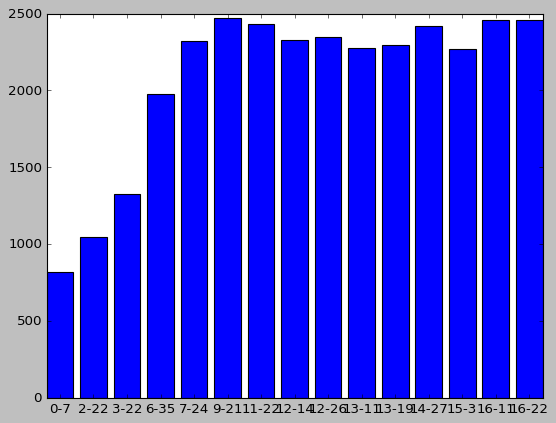

In [7]:
total_pkgs = []

for df in df_list:
    total_pkgs.append(len(df))

fig, ax = plt.subplots()
bars = ax.bar(lts_list, total_pkgs, align='center')
plt.show()

## 2. Graficar la distribución de los paquetes respecto a sus categorias (Un paquete tiene más de una categoria)

In [234]:
from api import create_lts_obj
categories = ['data', 'web', 'control', 'text', 'network']
data = {
    'data': [],
    'web': [],
    'control': [],
    'text': [],
    'network': []
}
count_pkgs = {
    'data': [],
    'web': [],
    'control': [],
    'text': [],
    'network': []
}
df_by_cat = []


for idx, df in enumerate(df_by_category_list):
    aux_df = df[['package', 'category']]
    aux_df = aux_df.groupby(['category']).count().reset_index().rename(columns={"package": "count"})
    aux_df.loc[:, 'version'] = lts_list[idx]
    df_by_cat.append(aux_df.sort_values(by=['count'], ascending=False))

for category in categories:
    for idx, lts in enumerate(lts_list):
        total_pkgs = len(df_by_category_list[idx])
        aux = int(df_by_cat[idx][df_by_cat[idx]['category'] == category]['count']) * 100 / total_pkgs
        count = int(df_by_cat[idx][df_by_cat[idx]['category'] == category]['count'])
        count_pkgs[category].append(count)
        data[category].append(aux)

others = []
per_others = []
for idx, lts in enumerate(lts_list):
    count = 0
    for category in count_pkgs:
        count += count_pkgs[category][idx]
    
    others.append(len(df_by_category_list[idx]) - count)
    per_others.append((len(df_by_category_list[idx]) - count) * 100 / len(df_by_category_list[idx]))

data['others'] = per_others
count_pkgs['others'] = others

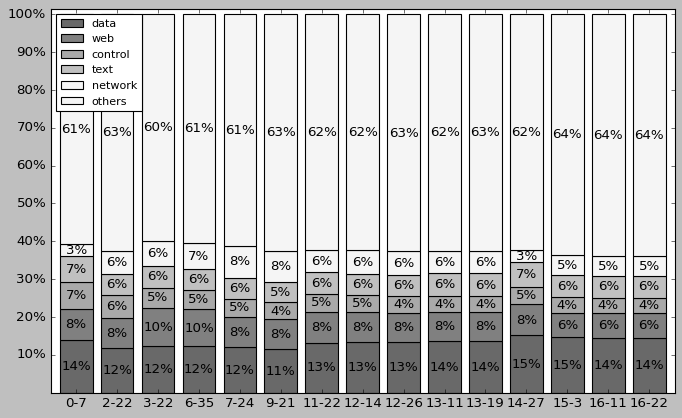

In [235]:
import operator
fig, ax = plt.subplots()
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)

bar1 = ax.bar(x=lts_list, height=data['data'], width=0.8, color='dimgrey', align='center', label='data')
bar2 = ax.bar(x=index, height=data['web'], width=0.8, bottom=data['data'], color='grey', label='web')
bar3 = ax.bar(x=index, height=data['control'], width=0.8, bottom=list(map(operator.add, data['data'], data['web'])), color='darkgrey', label='control')
bar4 = ax.bar(x=index, height=data['text'], width=0.8, bottom=list(map(operator.add, list(map(operator.add, data['data'], data['web'])), data['control'])), color='silver', label='text')
bar5 = ax.bar(x=index, height=data['network'], width=0.8, bottom=list(map(operator.add, list(map(operator.add, list(map(operator.add, data['data'], data['web'])), data['control'])), data['text'])), color='whitesmoke', label='network')
bar6 = ax.bar(x=index, height=data['others'], width=0.8, bottom=list(map(operator.add, list(map(operator.add, list(map(operator.add, list(map(operator.add, data['data'], data['web'])), data['control'])), data['text'])), data['network'])), color='whitesmoke', label='others')

ax.bar_label(bar1, labels=list(map(lambda per: f"{round(per)}%", data['data'])), label_type='center')
ax.bar_label(bar2, labels=list(map(lambda per: f"{round(per)}%", data['web'])), label_type='center')
ax.bar_label(bar3, labels=list(map(lambda per: f"{round(per)}%", data['control'])), label_type='center')
ax.bar_label(bar4, labels=list(map(lambda per: f"{round(per)}%", data['text'])), label_type='center')
ax.bar_label(bar5, labels=list(map(lambda per: f"{round(per)}%", data['network'])), label_type='center')
ax.bar_label(bar6, labels=list(map(lambda per: f"{round(per)}%", data['others'])), label_type='center')


ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(0, 1))
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()

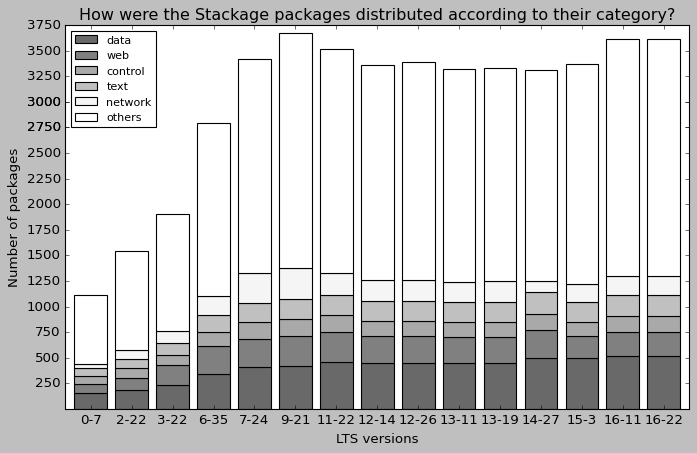

In [247]:
import operator
fig, ax = plt.subplots()
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)

bar1 = ax.bar(x=lts_list, height=count_pkgs['data'], width=0.8, color='dimgrey', align='center', label='data')
bar2 = ax.bar(x=index, height=count_pkgs['web'], width=0.8, bottom=count_pkgs['data'], color='grey', label='web')
bar3 = ax.bar(x=index, height=count_pkgs['control'], width=0.8, bottom=list(map(operator.add, count_pkgs['data'], count_pkgs['web'])), color='darkgrey', label='control')
bar4 = ax.bar(x=index, height=count_pkgs['text'], width=0.8, bottom=list(map(operator.add, list(map(operator.add, count_pkgs['data'], count_pkgs['web'])), count_pkgs['control'])), color='silver', label='text')
bar5 = ax.bar(x=index, height=count_pkgs['network'], width=0.8, bottom=list(map(operator.add, list(map(operator.add, list(map(operator.add, count_pkgs['data'], count_pkgs['web'])), count_pkgs['control'])), count_pkgs['text'])), color='whitesmoke', label='network')
bar6 = ax.bar(x=index, height=count_pkgs['others'], width=0.8, bottom=list(map(operator.add, list(map(operator.add, list(map(operator.add, list(map(operator.add, count_pkgs['data'], count_pkgs['web'])), count_pkgs['control'])), count_pkgs['text'])), count_pkgs['network'])), color='white', label='others')

'''
ax.bar_label(bar1, labels=list(map(lambda per: f"{round(per)}%", data['data'])), label_type='center')
ax.bar_label(bar2, labels=list(map(lambda per: f"{round(per)}%", data['web'])), label_type='center')
ax.bar_label(bar3, labels=list(map(lambda per: f"{round(per)}%", data['control'])), label_type='center')
ax.bar_label(bar4, labels=list(map(lambda per: f"{round(per)}%", data['text'])), label_type='center')
ax.bar_label(bar5, labels=list(map(lambda per: f"{round(per)}%", data['network'])), label_type='center')
ax.bar_label(bar6, labels=list(map(lambda per: f"{round(per)}%", data['others'])), label_type='center')
'''

ax.set_xlabel('LTS versions')
ax.set_ylabel('Number of packages')
ax.set_title('How were the Stackage packages distributed according to their category?')
ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(0, 1))
ax.set_yticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 2750, 3000, 3250, 3500, 3750])
plt.show()

# Evolucion del ecosistema de Haskell

## 1. ¿Cuales son los paquetes más utilizados actualmente?: 

In [8]:
from api import get_pkgs_usage_count
top_25_pkgs = []
top_25_count = []

packet_usage_count = get_pkgs_usage_count(df_list[14])
ordered_pkgs = sorted(packet_usage_count, key=packet_usage_count.get, reverse=True)[:25]

for pkg in ordered_pkgs:
    top_25_pkgs.append(pkg)
    top_25_count.append(packet_usage_count[pkg])

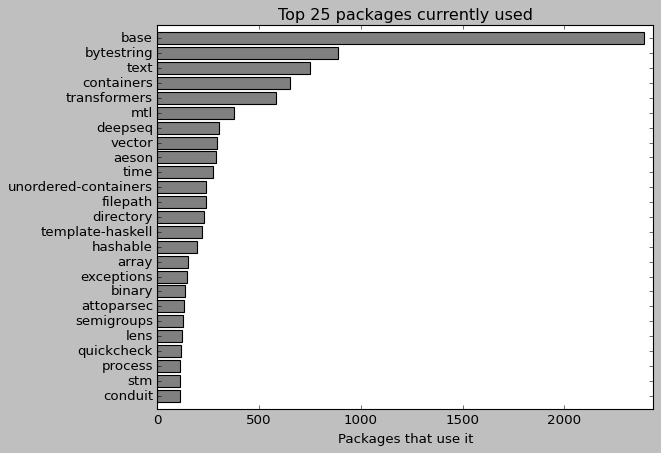

In [9]:
# Sacar base si es qe todos utilizan base por definicion.
fig, ax = plt.subplots()
ax.margins(0.02)   
hbars = ax.barh(top_25_pkgs, top_25_count, align='center', color='grey')
ax.invert_yaxis() 
ax.set_xlabel('Packages that use it')
ax.set_title('Top 25 packages currently used')
plt.show()

## 2. ¿Cuales de los paquetes mas utilizados estan fuera de la seleccion?:

Obtener un listado de todos los paquetes que fueron partes de Stackage en alguna version LTS. Filtrar el map de dependencias anterior con la lista retornando solo aquellos paquetes que no se encuentren en la lista.

In [10]:
from api import get_pkgs_usage_count, get_packages_out_of_stackage
pkgs_usage_count = get_pkgs_usage_count(df_list[14])
top = sorted(pkgs_usage_count, key=pkgs_usage_count.get, reverse=True)[:100]
get_packages_out_of_stackage(top, df_list[14])

['quickcheck', 'microlens', 'hunit', 'cabal', 'ghc']

## 3. ¿Cuantos paquetes quedan fuera de Stackage transitivamente?

In [11]:
from api import get_pkgs_out_transitively
out_transitive_pkgs = get_pkgs_out_transitively(df_list)

0-7 processed
2-22 processed
3-22 processed
6-35 processed
7-24 processed
9-21 processed
11-22 processed
12-14 processed
12-26 processed
13-11 processed
13-19 processed
14-27 processed
15-3 processed
16-11 processed
16-22 processed


In [12]:
count_transitive = {}
per_transitive = {}
diff_transitive = {}  
diff_per_transitive = {} 

for idx, lts in enumerate(out_transitive_pkgs):
    count_transitive[lts] = out_transitive_pkgs[lts]
    per_transitive[lts] = round(out_transitive_pkgs[lts]*100 / len(df_list[idx]), 1)
    diff_transitive[lts] = len(df_list[idx]) - out_transitive_pkgs[lts]
    diff_per_transitive[lts] = 100 - per_transitive[lts]
    
index = list(per_transitive.keys())
count_values = list(count_transitive.values())
per_values = list(per_transitive.values())
diff_values = list(diff_transitive.values())
diff_per_values = list(diff_per_transitive.values())

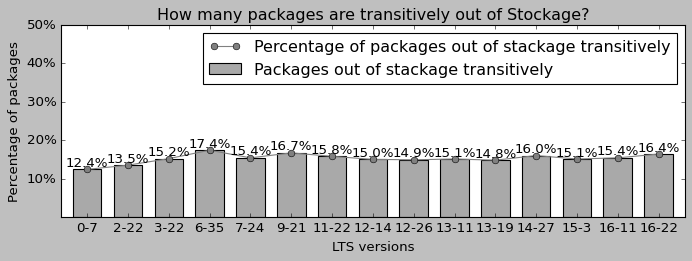

In [13]:
ax = plt.gca()
ax.margins(0.02)    
plt.subplots_adjust(bottom=0.1, right=1.1, top=0.5)
bar = ax.bar(index, per_values, width=0.7, color='darkgrey', align='center', label='Packages out of stackage transitively')
line = ax.plot(index, per_values, color='grey', marker='o', label='Percentage of packages out of stackage transitively')
ax.legend(loc='best')
ax.set_xlabel('LTS versions')
ax.set_ylabel('Percentage of packages')
ax.set_title('How many packages are transitively out of Stockage?')
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%'])
ax.bar_label(bar, labels=list(map(lambda per: f"{per}%", per_values)))
plt.show()

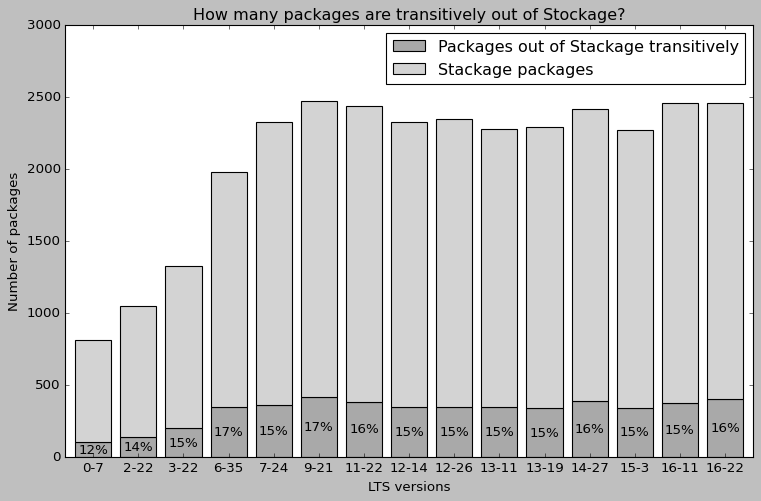

In [26]:
fig, ax = plt.subplots()
ax.margins(0.015) 
plt.subplots_adjust(bottom=0.1, right=1.2, top=1)
bar1 = ax.bar(x=index, height=count_values, width=0.8, color='darkgrey', align='center', label='Packages out of Stackage transitively')
bar2 = ax.bar(index, diff_values, width=0.8, bottom=count_values, color='lightgrey', label='Stackage packages')
ax.legend(loc='best')
ax.set_xlabel('LTS versions')
ax.set_ylabel('Number of packages')
ax.set_title('How many packages are transitively out of Stockage?')
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
ax.bar_label(bar1, labels=list(map(lambda per: f"{round(per)}%", per_values)), label_type='center')

plt.show()

In [15]:
import statistics
mean = statistics.mean(list(per_transitive.values()))
print(f'average over time {mean:.1f}%')

average over time 15.3%


### 4. ¿Que tan frecuente se actualizan los paquetes? 
- ¿Acumulado hasta cada version?*

In [16]:
from api import get_versions_df, get_update_count_df, get_count_updated_packages_by_lts
versions_df = get_versions_df(df_list)

In [17]:
update_count_df = get_update_count_df(df_list, versions_df)

In [18]:
count_updated_packages_by_lts = get_count_updated_packages_by_lts(df_list, update_count_df)

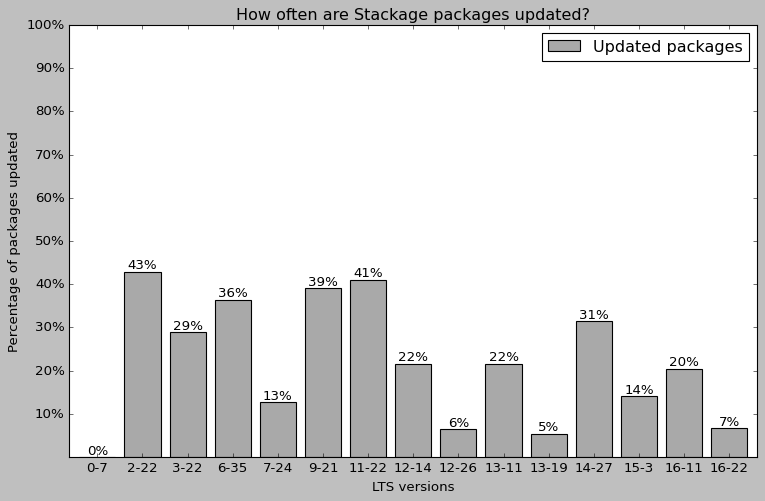

In [19]:
index = list(count_updated_packages_by_lts.keys())
updated_packages = list(count_updated_packages_by_lts.values())

fig, ax = plt.subplots()
ax.margins(0.015) 
plt.subplots_adjust(bottom=0.1, right=1.2, top=1)

bar1 = ax.bar(index, updated_packages, width=0.8, color='darkgrey', align='center', label='Updated packages')
ax.bar_label(bar1, labels=list(map(lambda per: f"{round(per)}%", updated_packages)))

ax.legend(loc='best')
ax.set_xlabel('LTS versions')
ax.set_ylabel('Percentage of packages updated')
ax.set_title('How often are Stackage packages updated?')
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])


plt.show()

# Evolucion del uso de monadas por los desarrolladores

## 5. ¿Que porcentaje de paquetes utilizan mtl a lo largo del tiempo?

In [27]:
from api import create_lts_obj
per_mtl_pkgs = create_lts_obj()
for idx, df in enumerate(df_list):
    percentage = len(df[df['mtl-direct'] == 1]) * 100 / len(df)
    per_mtl_pkgs[lts_list[idx]] = percentage

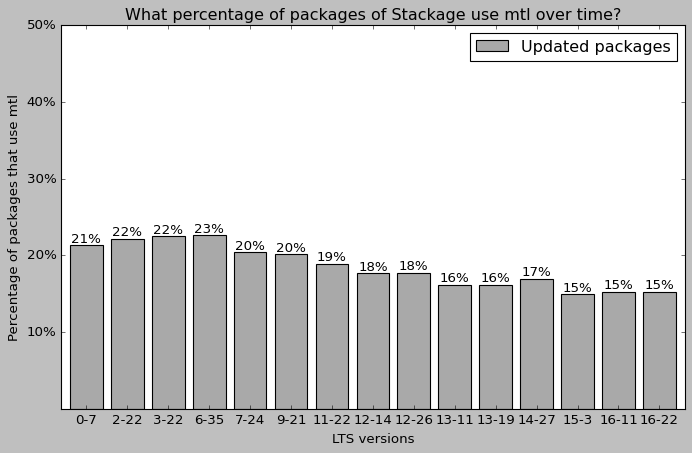

In [37]:
index = list(per_mtl_pkgs.keys())
mtl_pkgs = list(per_mtl_pkgs.values())

fig, ax = plt.subplots()
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)
bar1 = ax.bar(index, mtl_pkgs, width=0.8, color='darkgrey', align='center', label='Updated packages')
ax.bar_label(bar1, labels=list(map(lambda per: f"{round(per)}%", mtl_pkgs)))
ax.legend(loc='best')
ax.set_xlabel('LTS versions')
ax.set_ylabel('Percentage of packages that use mtl')
ax.set_title('What percentage of packages of Stackage use mtl over time?')
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%'])

plt.show()

In [24]:
import statistics
mean = statistics.mean(list(per_mtl_pkgs.values()))
print(f'average over time {mean:.1f}%')

average over time 18.5%


## 6. ¿Como crecio la cantidad de paquetes que usan monadas frente a la cantidad de paquetes que dejaron de utilizarlas en el tiempo?

In [29]:
from api import get_all_time_packages, build_mtl_continuity_matrix
mtl_continuity_df = build_mtl_continuity_matrix(df_list, get_all_time_packages(df_list))

In [30]:
from api import get_added_packages_mtl_by_lts, get_removed_packages_mtl_by_lts
added_mtl_pkgs_count = get_added_packages_mtl_by_lts(mtl_continuity_df)
removed_mtl_pkgs_count = get_removed_packages_mtl_by_lts(mtl_continuity_df)

In [31]:
total = []
for idx, lts in enumerate(lts_list):
    total.append(added_mtl_pkgs_count[idx] - removed_mtl_pkgs_count[idx])

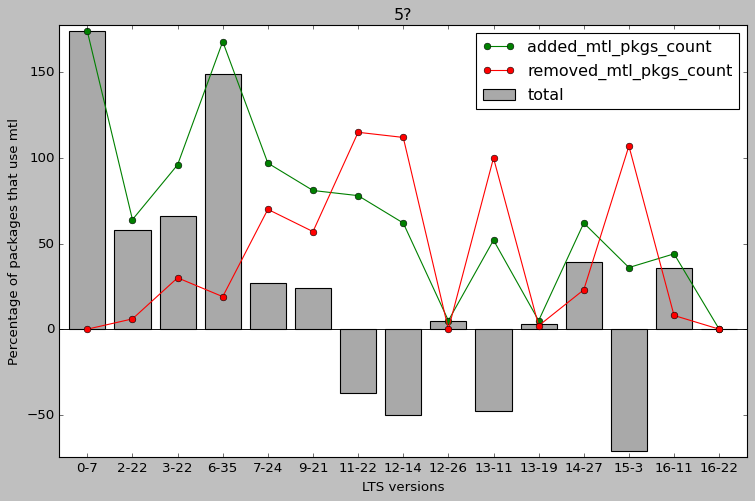

In [32]:
fig, ax = plt.subplots()
ax.margins(0.015) 
plt.subplots_adjust(bottom=0.1, right=1.2, top=1)
ax.axhline(0, color='black', linewidth=0.8)

bar1 = ax.bar(index, total, width=0.8, color='darkgrey', align='center', label='total')
line = ax.plot(index, added_mtl_pkgs_count, color='green', marker='o', label='added_mtl_pkgs_count')
line = ax.plot(index, removed_mtl_pkgs_count, color='red', marker='o', label='removed_mtl_pkgs_count')
# ax.bar_label(bar1, labels=list(map(lambda per: f"{round(per)}%", mtl_pkgs)))

ax.legend(loc='best')
ax.set_xlabel('LTS versions')
ax.set_ylabel('Percentage of packages that use mtl')
ax.set_title('5?')

plt.show()

## 7. ¿Cuantas monadas utilizan los paquetes que usan mtl? ¿Que tipos de monadas utilizan los paquetes que usan mtl?

### 8. ¿Que paquetes que ya usaban monadas en sus futuras versiones dejaron de usarlas? (en porcentaje (en categoria) y ) ¿en cada version cuantas dejaron de utilzar mtl?)

- Nacieron usando mtl y dejaron de usar mtl pero se mantuvieron en la selección
- Nacieron sin usar mtl y comenzaron a utilizar mtl en el futuro